Dragon Real Estate - Price Prediction

In [268]:
import pandas as pd

In [269]:
housing = pd.read_csv("/content/sample_data/housing.csv")

In [270]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [271]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [272]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [273]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285677,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705424,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [274]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7390d17290>,
      dtype=object)

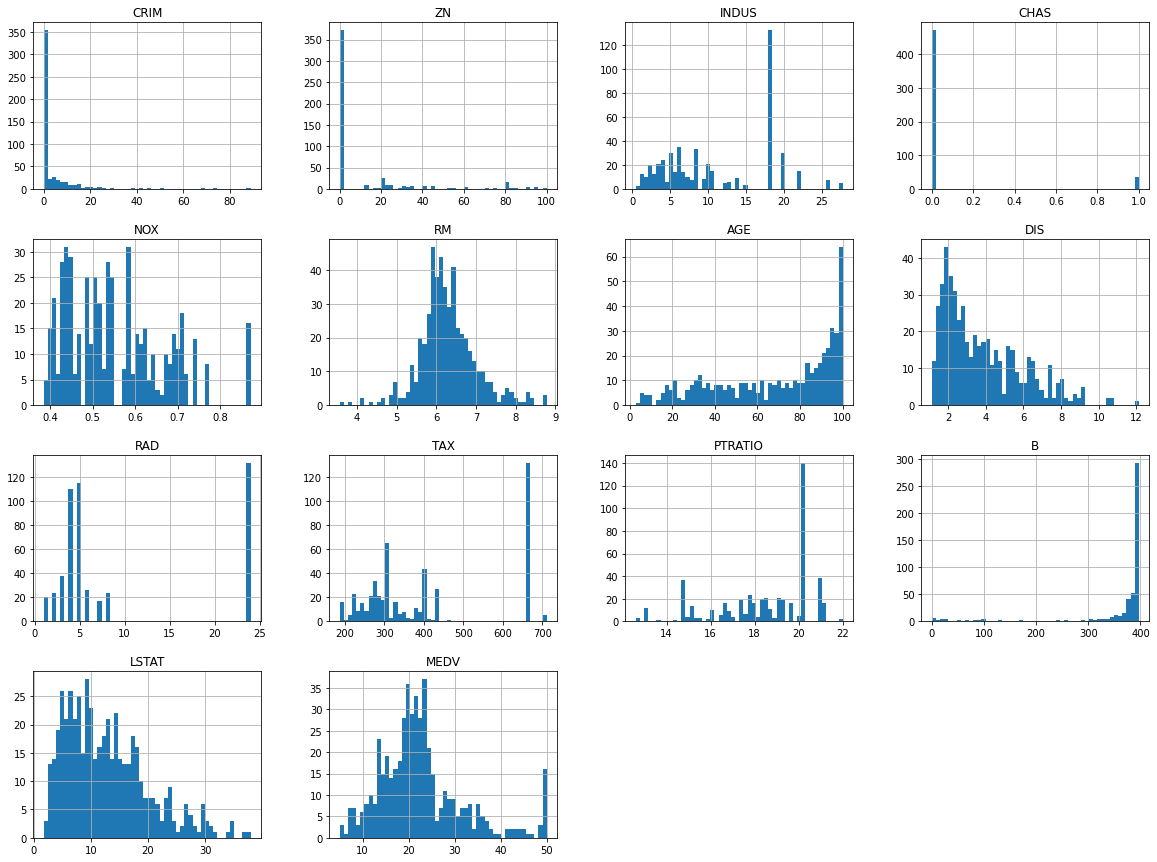

In [275]:
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize=(20,15))

**Train Test Splitting**

In [276]:
'''
import numpy as np

def split_train_test(data, test_ratio):
  np.random.seed(42)
  shuffled = np.random.permutation(len(data))
  print(shuffled)
  test_set_size = int(len(data)*test_ratio)
  train_indices = shuffled[test_set_size:]
  test_indices = shuffled[:test_set_size]
  return data.iloc[train_indices], data.iloc[test_indices]
'''

'\nimport numpy as np\n\ndef split_train_test(data, test_ratio):\n  np.random.seed(42)\n  shuffled = np.random.permutation(len(data))\n  print(shuffled)\n  test_set_size = int(len(data)*test_ratio)\n  train_indices = shuffled[test_set_size:]\n  test_indices = shuffled[:test_set_size]\n  return data.iloc[train_indices], data.iloc[test_indices]\n'

In [277]:
'''
train_set, test_set = split_train_test(housing, 0.2)

print(f"Rows in Train Set {len(train_set)}\n Rows in Train Set {len(test_set)}\n")
'''

'\ntrain_set, test_set = split_train_test(housing, 0.2)\n\nprint(f"Rows in Train Set {len(train_set)}\n Rows in Train Set {len(test_set)}\n")\n'

In [278]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Rows in Train Set {len(train_set)}\n Rows in Train Set {len(test_set)}\n")

Rows in Train Set 404
 Rows in Train Set 102



In [279]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
  

In [280]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [281]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [282]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695294
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f738fe6ed90>,
      dtype=object)

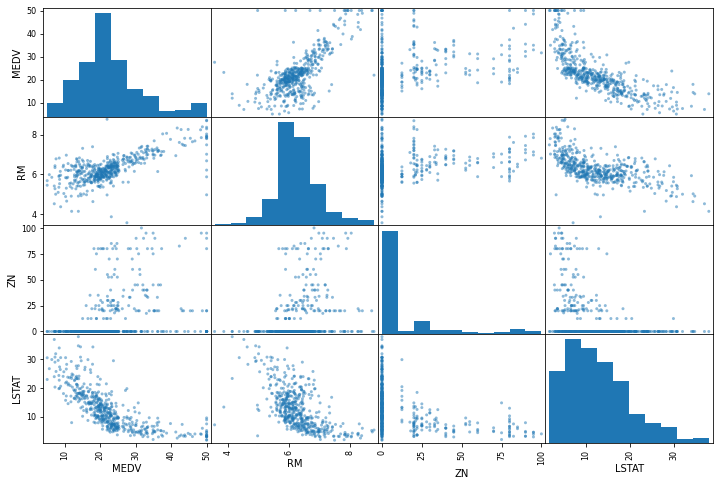

In [283]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

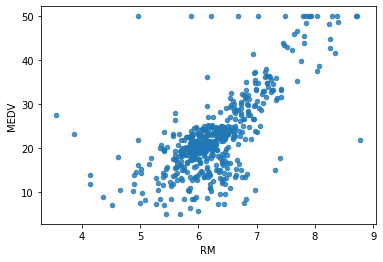

In [284]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha = 0.8)

In [285]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [286]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695294
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.539758
LSTAT     -0.737663
Name: MEDV, dtype: float64

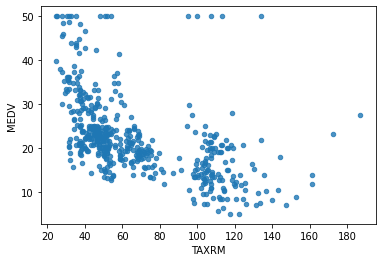

In [287]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha = 0.8)

In [288]:
a = housing.dropna(subset=["RM"])
a.shape

(501, 15)

In [289]:
housing.drop("RM", axis=1).shape

(506, 14)

In [290]:
median = housing['RM'].median()
median

6.209

In [291]:
housing['RM'].fillna(median)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.209
Name: RM, Length: 506, dtype: float64

In [292]:
housing.shape

(506, 15)

In [293]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing) 

SimpleImputer(strategy='median')

In [294]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36078965e+01])

In [295]:
X = imputer.transform(housing)

In [296]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [297]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284919,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.800859
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701964,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.304628
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,44.024784
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


Scikit Learn Design

Creating a **Pipeline**

In [298]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        # add as many arguments...
                        ('std_scaler', StandardScaler())
])


In [299]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set['MEDV'].copy() 

In [300]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [301]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

**Selecting a Desired Model**

In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [303]:
some_data = housing.iloc[:5]
some_data_label = housing_labels.iloc[:5]

In [304]:
prepared_data = my_pipeline.transform(some_data)

In [305]:
model.predict(prepared_data)

array([22.237, 25.619, 16.656, 23.558, 23.417])

In [306]:
list(some_data_label)

[21.9, 24.5, 16.7, 23.1, 23.0]


Evaluating the model

In [307]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)


In [308]:
mse

1.4901697128712847

Using better Evaluation Technique

In [309]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [310]:
rmse_scores

array([2.80978238, 2.8483791 , 4.42155358, 2.51755052, 3.45155312,
       2.61957624, 4.71388486, 3.24313782, 3.06652045, 3.35560204])

In [311]:
def print_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard Deviation: ", scores.std())


In [312]:
print_scores(scores)

Scores:  [ -7.89487702  -8.11326349 -19.55013607  -6.33806063 -11.91321892
  -6.86217968 -22.2207105  -10.51794295  -9.40354768 -11.26006505]
Mean:  -11.40740019945122
Standard Deviation:  5.078014725337635


In [316]:
from joblib import dump, load
dump(model, 'Dragon.joblib')


['Dragon.joblib']

In [317]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [318]:
final_rmse

2.9150539715179793

In [320]:
print(final_predictions, list(Y_test))

[24.553 11.467 24.8   22.503 18.236 14.633 19.878 14.579 31.491 42.555
 19.73  11.729 23.701 28.878 19.66  10.96  31.133 14.11  23.596 18.365
 19.535 18.056 17.319 22.437 18.827 31.173 16.144 33.449  9.26  33.314
 23.132 21.265 23.025 11.332 21.147 10.931 43.161 24.363 22.934 42.212
 24.083 30.98  20.47  21.003 19.632 33.737 44.109 20.416 19.931 21.584
 21.202 14.375 21.299 15.2   25.139 33.324 43.023 29.026 19.327 21.105
 47.3    9.61  18.864 26.142 14.751 33.447 20.309 17.662 19.695 34.638
 25.635 22.989 21.251 22.485 34.645 13.119 15.913 19.795 21.077 21.634
 22.556 22.296 13.799 22.554 20.903 21.375 13.117 21.133 21.844 23.616
 19.124 27.287  7.438 26.247 19.099 29.225 19.48  31.084 13.919 26.658
 21.09  20.254] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1